In [2]:
# data processing
import pandas as pd
import numpy as np

# visulization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# feature extraction
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

# test train split
from sklearn.model_selection import train_test_split

# evaluation metrices
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

# machine learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Dataset/Sarcasm Dataset.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,tweet,sarcastic,sarcasm,irony,satire,understatement,overstatement,rhetorical_question
0,The only thing I got from college is a caffein...,1,0.0,1.0,0.0,0.0,0.0,0.0
1,I love it when professors draw a big question ...,1,1.0,0.0,0.0,0.0,0.0,0.0
2,Remember the hundred emails from companies whe...,1,0.0,1.0,0.0,0.0,0.0,0.0
3,Today my pop-pop told me I was not “forced” to...,1,1.0,0.0,0.0,0.0,0.0,0.0
4,@VolphanCarol @littlewhitty @mysticalmanatee I...,1,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['sarcastic'].value_counts()

sarcastic
0    2601
1     867
Name: count, dtype: int64

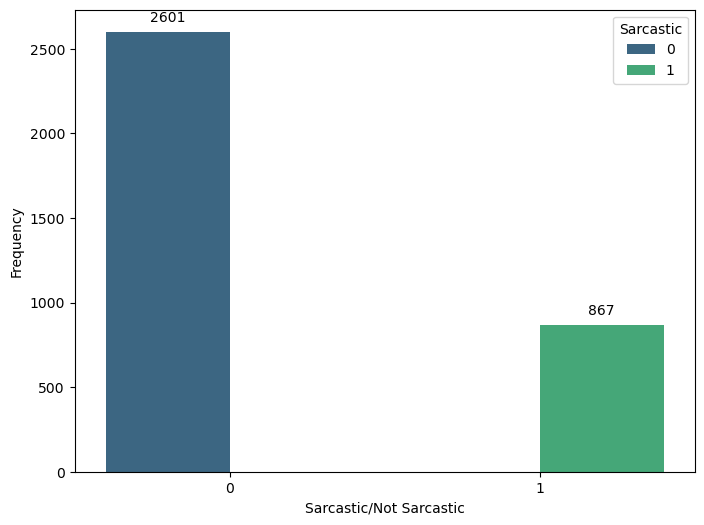

In [5]:
sarcastic_counts = df['sarcastic'].value_counts().reset_index()
sarcastic_counts.columns = ['Sarcastic', 'Count']
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Sarcastic', y='Count', data=sarcastic_counts, hue='Sarcastic', palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sarcastic/Not Sarcastic')
plt.ylabel('Frequency')

plt.show()

In [6]:
df['tweet'].isnull().sum()

1

In [7]:
df.dropna(subset=['tweet'], inplace=True)
df.dropna(subset=['sarcastic'], inplace=True)

In [8]:
def evaluate_classifier(classifier, X_test, y_test):
    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    # Calculate metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average='weighted')
    recall = metrics.recall_score(y_test, y_pred, average='weighted')
    f1_score = metrics.f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1_score


## **Binary Classification**

### **Bag of words based on raw counts** 

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])
X

<3467x10454 sparse matrix of type '<class 'numpy.int64'>'
	with 56597 stored elements in Compressed Sparse Row format>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sarcastic'], test_size=0.2, random_state=42)

In [11]:
#### Naive Bayes
nb_classifier= MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

#### Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

#### Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

#### Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

#### Perceptron
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)
y_pred_perceptron = perceptron_classifier.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)

Naive Bayes Accuracy: 0.7031700288184438


Logistic Regression Accuracy: 0.6988472622478387
Random Forest Accuracy: 0.7118155619596542
SVM Accuracy: 0.7132564841498559
Perceptron Accuracy: 0.6426512968299711


#### Evaluation

In [12]:
# Evaluate classifiers
nb_results = evaluate_classifier(nb_classifier, X_test, y_test)
lr_results = evaluate_classifier(lr_classifier, X_test, y_test)
rf_results = evaluate_classifier(rf_classifier, X_test, y_test)
svm_results = evaluate_classifier(svm_classifier, X_test, y_test)
perceptron_results = evaluate_classifier(perceptron_classifier, X_test, y_test)

results_df = pd.DataFrame({
    'Classifier': ['Naïve Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'Perceptron'],
    'Accuracy': [nb_results[0], lr_results[0], rf_results[0], svm_results[0], perceptron_results[0]],
    'Precision': [nb_results[1], lr_results[1], rf_results[1], svm_results[1], perceptron_results[1]],
    'Recall': [nb_results[2], lr_results[2], rf_results[2], svm_results[2], perceptron_results[2]],
    'F1 Score': [nb_results[3], lr_results[3], rf_results[3], svm_results[3], perceptron_results[3]]
})

results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naïve Bayes,0.703170,0.652219,0.703170,0.651175
1,Logistic Regression,0.698847,0.642973,0.698847,0.643996
2,Random Forest,0.711816,0.624018,0.711816,0.598396
3,SVM,0.713256,0.508735,0.713256,0.593881
4,Perceptron,0.642651,0.604197,0.642651,0.618299


### **Bag of words based on TfIDF**

In [13]:
# convert to array
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['tweet'])

# convert to tf-idf
transformer = TfidfTransformer(smooth_idf=False)
tfidf_matrix = transformer.fit_transform(X)
tfidf_matrix

<3467x10454 sparse matrix of type '<class 'numpy.float64'>'
	with 56597 stored elements in Compressed Sparse Row format>

In [14]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['sarcastic'], test_size=0.2, random_state=42)

In [15]:
#### Naive Bayes
nb_classifier= MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

#### Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

#### Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

#### Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

#### Perceptron
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)
y_pred_perceptron = perceptron_classifier.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)


Naive Bayes Accuracy: 0.7132564841498559
Logistic Regression Accuracy: 0.7161383285302594
Random Forest Accuracy: 0.7146974063400576
SVM Accuracy: 0.7132564841498559
Perceptron Accuracy: 0.6585014409221902


#### Evaluation

In [16]:
# Evaluate classifiers
nb_results = evaluate_classifier(nb_classifier, X_test, y_test)
lr_results = evaluate_classifier(lr_classifier, X_test, y_test)
rf_results = evaluate_classifier(rf_classifier, X_test, y_test)
svm_results = evaluate_classifier(svm_classifier, X_test, y_test)
perceptron_results = evaluate_classifier(perceptron_classifier, X_test, y_test)

results_df = pd.DataFrame({
    'Classifier': ['Naïve Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'Perceptron'],
    'Accuracy': [nb_results[0], lr_results[0], rf_results[0], svm_results[0], perceptron_results[0]],
    'Precision': [nb_results[1], lr_results[1], rf_results[1], svm_results[1], perceptron_results[1]],
    'Recall': [nb_results[2], lr_results[2], rf_results[2], svm_results[2], perceptron_results[2]],
    'F1 Score': [nb_results[3], lr_results[3], rf_results[3], svm_results[3], perceptron_results[3]]
})

results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naïve Bayes,0.713256,0.508735,0.713256,0.593881
1,Logistic Regression,0.716138,0.796949,0.716138,0.600587
2,Random Forest,0.714697,0.701074,0.714697,0.599858
3,SVM,0.713256,0.508735,0.713256,0.593881
4,Perceptron,0.658501,0.614895,0.658501,0.628834


### **N-grams (bigrams, trigrams)**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['sarcastic'], test_size=0.2, random_state=42)

In [18]:
# Use CountVectorizer to convert text data into n-grams
vectorizer = CountVectorizer(ngram_range=(2, 3))
X_train = vectorizer.fit_transform(X_train)
X_test= vectorizer.transform(X_test)

In [19]:
#### Naive Bayes
nb_classifier= MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naive Bayes Accuracy:", accuracy)

#### Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

#### Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

#### Support Vector Machine (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

#### Perceptron
perceptron_classifier = Perceptron()
perceptron_classifier.fit(X_train, y_train)
y_pred_perceptron = perceptron_classifier.predict(X_test)
accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
print("Perceptron Accuracy:", accuracy_perceptron)


Naive Bayes Accuracy: 0.7089337175792507
Logistic Regression Accuracy: 0.7132564841498559
Random Forest Accuracy: 0.7190201729106628
SVM Accuracy: 0.7132564841498559
Perceptron Accuracy: 0.6642651296829971


#### Evaluation

In [20]:
# Evaluate classifiers
nb_results = evaluate_classifier(nb_classifier, X_test, y_test)
lr_results = evaluate_classifier(lr_classifier, X_test, y_test)
rf_results = evaluate_classifier(rf_classifier, X_test, y_test)
svm_results = evaluate_classifier(svm_classifier, X_test, y_test)
perceptron_results = evaluate_classifier(perceptron_classifier, X_test, y_test)

results_df = pd.DataFrame({
    'Classifier': ['Naïve Bayes', 'Logistic Regression', 'Random Forest', 'SVM', 'Perceptron'],
    'Accuracy': [nb_results[0], lr_results[0], rf_results[0], svm_results[0], perceptron_results[0]],
    'Precision': [nb_results[1], lr_results[1], rf_results[1], svm_results[1], perceptron_results[1]],
    'Recall': [nb_results[2], lr_results[2], rf_results[2], svm_results[2], perceptron_results[2]],
    'F1 Score': [nb_results[3], lr_results[3], rf_results[3], svm_results[3], perceptron_results[3]]
})

results_df

,Classifier,Accuracy,Precision,Recall,F1 Score
0,Naïve Bayes,0.708934,0.649528,0.708934,0.633154
1,Logistic Regression,0.713256,0.508735,0.713256,0.593881
2,Random Forest,0.719020,0.798428,0.719020,0.607185
3,SVM,0.713256,0.508735,0.713256,0.593881
4,Perceptron,0.664265,0.603870,0.664265,0.620205


## **Multi Class Classification**

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Dense
import pandas as pd

class SarcasmDataset:
    def __init__(self, data_path):
        self.data_path = data_path
        self.df = None
        self.X_train = None
        self.X_test = None
        self.y_train_binary = None
        self.y_test_binary = None
        self.y_train_multiclass = None
        self.y_test_multiclass = None
        self.tokenizer = None
        self.max_len = None
        self.vocab_size = None
        self.le_binary = None
        self.le_multiclass = None

    def load_data(self):
        self.df = pd.read_csv(self.data_path)
        self.df.drop('Unnamed: 0', axis=1, inplace=True)
        self.df.dropna(subset=['tweet', 'sarcastic'], inplace=True)

    def preprocess_data(self):
        X = self.df['tweet']
        y_binary = self.df['sarcastic']
        y_multiclass = self.df[['sarcasm', 'irony', 'satire', 'understatement', 'overstatement', 'rhetorical_question']].idxmax(axis=1)

        self.le_binary = LabelEncoder()
        y_binary = self.le_binary.fit_transform(y_binary)

        self.le_multiclass = LabelEncoder()
        y_multiclass = self.le_multiclass.fit_transform(y_multiclass)

        self.X_train, self.X_test, self.y_train_binary, self.y_test_binary = train_test_split(X, y_binary, test_size=0.25, random_state=42)
        self.X_train, self.X_test, self.y_train_multiclass, self.y_test_multiclass = train_test_split(X, y_multiclass, test_size=0.25, random_state=42)

    def tokenize_data(self):
        self.tokenizer = Tokenizer()
        self.tokenizer.fit_on_texts(self.X_train)
        X_train_seq = self.tokenizer.texts_to_sequences(self.X_train)
        X_test_seq = self.tokenizer.texts_to_sequences(self.X_test)

        self.max_len = max(len(seq) for seq in X_train_seq)
        self.X_train = pad_sequences(X_train_seq, maxlen=self.max_len)
        self.X_test = pad_sequences(X_test_seq, maxlen=self.max_len)
        self.vocab_size = len(self.tokenizer.word_index) + 1

    def get_data(self):
        return (self.X_train, self.X_test, self.y_train_binary, self.y_test_binary,
                self.y_train_multiclass, self.y_test_multiclass, self.max_len, self.vocab_size,
                self.le_binary.classes_, self.le_multiclass.classes_)

In [37]:
# Load the dataset
dataset = SarcasmDataset('../Dataset/Sarcasm Dataset.csv')
dataset.load_data()
dataset.preprocess_data()
dataset.tokenize_data()

# Get the preprocessed data
X_train, X_test, y_train_binary, y_test_binary, y_train_multiclass, y_test_multiclass, max_len, vocab_size, binary_classes, multiclass_classes = dataset.get_data()

### **LSTM**

In [44]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

hyperparameters = [
    {'num_layers': 2, 'dropout_rate': 0.3},
    {'num_layers': 2, 'dropout_rate': 0.7},
    {'num_layers': 3, 'dropout_rate': 0.3},
    {'num_layers': 3, 'dropout_rate': 0.7}
]

results = []

for params in hyperparameters:
    num_layers = params['num_layers']
    dropout_rate = params['dropout_rate']

    # Using preprocessed data from the get_data() method
    X_train, X_test, _, _, y_train, y_test, _, _, _, _ = dataset.get_data()

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.LSTM(128, return_sequences=True))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.LSTM(128))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))  # softmax for multiclass

    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Training with {num_layers} layers and dropout rate {dropout_rate}")
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    results.append({
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1_score': round(f1, 2)
    })

results_df = pd.DataFrame(results)
results_df

Training with 2 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Training with 2 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step
Training with 3 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
Training with 3 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


,num_layers,dropout_rate,accuracy,precision,recall,f1_score
0,2,0.3,0.72,0.51,0.72,0.6
1,2,0.7,0.72,0.51,0.72,0.6
2,3,0.3,0.72,0.51,0.72,0.6
3,3,0.7,0.72,0.51,0.72,0.6


### **RNN**

In [46]:
hyperparameters = [
    {'num_layers': 2, 'dropout_rate': 0.3},
    {'num_layers': 2, 'dropout_rate': 0.7},
    {'num_layers': 3, 'dropout_rate': 0.3},
    {'num_layers': 3, 'dropout_rate': 0.7}
]

results_rnn = []

for params in hyperparameters:
    num_layers = params['num_layers']
    dropout_rate = params['dropout_rate']

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.SimpleRNN(128, return_sequences=True))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.SimpleRNN(128))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Training RNN with {num_layers} layers and dropout rate {dropout_rate}")
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    results_rnn.append({
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1_score': round(f1, 2)
    })

results_rnn_df = pd.DataFrame(results_rnn)
(results_rnn_df)


Training RNN with 2 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
Training RNN with 2 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Training RNN with 3 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Training RNN with 3 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


,num_layers,dropout_rate,accuracy,precision,recall,f1_score
0,2,0.3,0.63,0.56,0.63,0.59
1,2,0.7,0.72,0.51,0.72,0.60
2,3,0.3,0.72,0.51,0.72,0.60
3,3,0.7,0.72,0.51,0.72,0.60


### **GRU**

In [47]:
results_gru = []

for params in hyperparameters:
    num_layers = params['num_layers']
    dropout_rate = params['dropout_rate']

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.GRU(128, return_sequences=True))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.GRU(128))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Training GRU with {num_layers} layers and dropout rate {dropout_rate}")
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    results_gru.append({
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1_score': round(f1, 2)
    })

results_gru_df = pd.DataFrame(results_gru)
print(results_gru_df)


Training GRU with 2 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step
Training GRU with 2 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step
Training GRU with 3 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step
Training GRU with 3 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step
   num_layers  dropout_rate  accuracy  precision  recall  f1_score
0           2           0.3      0.65       0.60    0.65      0.62
1           2           0.7      0.60       0.59    0.60      0.60
2           3           0.3      0.61       0.57    0.61      0.59
3           3           0.7      0.62       0.58    0.62      0.60


### **BiLSTM**

In [48]:
results_bilstm = []

for params in hyperparameters:
    num_layers = params['num_layers']
    dropout_rate = params['dropout_rate']

    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=100))
    
    for _ in range(num_layers):
        model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)))
        model.add(tf.keras.layers.Dropout(dropout_rate))
    
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
    model.add(tf.keras.layers.Dense(6, activation='softmax'))

    optimizer = tf.keras.optimizers.Adam()
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    print(f"Training BiLSTM with {num_layers} layers and dropout rate {dropout_rate}")
    model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=0)

    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes, average='weighted')
    recall = recall_score(y_test, y_pred_classes, average='weighted')
    f1 = f1_score(y_test, y_pred_classes, average='weighted')

    results_bilstm.append({
        'num_layers': num_layers,
        'dropout_rate': dropout_rate,
        'accuracy': round(accuracy, 2),
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'f1_score': round(f1, 2)
    })

results_bilstm_df = pd.DataFrame(results_bilstm)
print(results_bilstm_df)


Training BiLSTM with 2 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step
Training BiLSTM with 2 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step
Training BiLSTM with 3 layers and dropout rate 0.3
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step
Training BiLSTM with 3 layers and dropout rate 0.7
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step
   num_layers  dropout_rate  accuracy  precision  recall  f1_score
0           2           0.3      0.63       0.60    0.63      0.61
1           2           0.7      0.62       0.58    0.62      0.60
2           3           0.3      0.64       0.60    0.64      0.62
3           3           0.7      0.66       0.61    0.66      0.63
